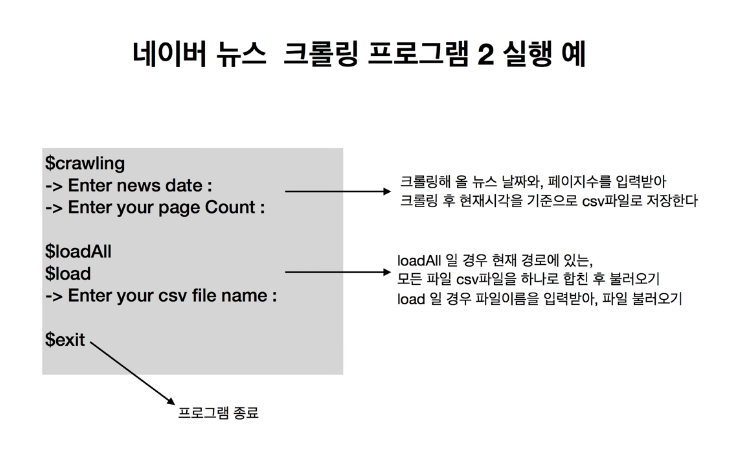

In [1]:
import requests, operator, pandas, glob2
from bs4 import BeautifulSoup
from datetime import datetime

In [2]:
# 크롤링 함수(날짜와 페이지수를 입력받아 그날짜의 그 페이지수만큼 크롤링 해옴)
def crawlingData(date, pageCount):

    # 현재 시각을 now라는 변수에 저장
    now = datetime.now()
    l = [] # 리스트 l

    # pagecount는 1페이지부터 사용자가 입력한 페이지 수까지 됨
    for pagecount in range(1, int(pageCount)):

        # 동적으로, 사용자가 입력한 날짜와 뉴스 페이지에 접속
        r = requests.get("http://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1=100&date=" + str(date) + "&page=" + str(pagecount))
        c = r.content
        soup = BeautifulSoup(c, "html.parser")
        all = soup.find_all("li")

        for item in all:
            for item2 in item.find_all("dl"):
                d = {} # 사전 d
                try:
                    linkTag = item2.find("dt", {"class": ""}).find("a")
                    d["LinkSrc"] = linkTag['href'] # 사전 d의 LinkSrc라는 키에 href 내용을 가져와 저장
                    d["Title"] = linkTag.text.replace("\t", "").replace("\n", "").replace(",", "").replace('"',"").replace("\r", "")[1:len(linkTag.text) + 1]
                except:
                    d["LinkSrc"] = "None"
                    d["Title"] = "None"

                try:
                    contentTag = item2.find("dd")
                    d["Content"] = \
                    contentTag.text.replace("\t", "").replace("\n", "").replace("\r", "").replace(",", "").replace('"',"").split("…")[0]
                    d["Company"] = contentTag.find("span", {"class": "writing"}).text
                    d["Date"] = contentTag.find("span", {"class": "date"}).text
                    print(d["Content"])
                except:
                    d["Content"] = "None"
                    d["Company"] = "None"
                    d["Date"] = "None"

                try:
                    imgTag = item2.find("dt", {"class": "photo"}).find("img")
                    d["imgSrc"] = imgTag["src"]
                except:
                    d["imgSrc"] = "No image"

                l.append(d) # 리스트에 사전 추가 / 한 행마다 사전에 추가

    df = pandas.DataFrame(l) # pandas 사용 l의 데이터프레임화

    # now(현재시각)을 이용해 csv 파일로 저장
    df.to_csv('%s-%s-%s-%s-%s-%s.csv' % (now.year, now.month, now.day, now.hour, now.minute, now.second),
              encoding='utf-8-sig', index=False)
    print("Success Get DataFIle and Save Data")

In [3]:
# loadFile 함수
def loadFile(fileName):
    # checkFileName함수를 호출, 파일이 존재하나 존재하지 않는가 확인
    outputFileName = checkFileName(fileName)

    if outputFileName is not -1:
        df = pandas.read_csv(outputFileName)
        content = df["Content"]
        title = df["Title"]
        company = df["Company"]
        print(company)

        print("csv FIle Load Success")
    else:
        print("Error csv File")

In [4]:
# checkFileName 함수
# 사용자가 입력한 파일명이 존재하지 않을시 -1 리턴, 존재시 파일명 리턴
# 사용자 입력값이 all이면 같은 경로의 모든 csv파일을 하나로 합치고, csv파일을 새로 만듦
# 그리고 만들어진 csv 파일을 리턴
def checkFileName(fileName):
    now = datetime.now()

    # 같은 경로에 csv 파일이 하나도 없다면 -1 리턴
    if len(glob2.glob("*.csv")) == 0:
        print("No file found in this directory")
        return -1
    else:
        # 사용자가 입력한 값이 all 이라면
        if fileName == "all":
            result = []
            # for 문을 돌며 모든 csv 파일을 가져와 읽은 후 result라는 리스트에 저장
            for i in glob2.glob("*.csv"):
                result.append(pandas.read_csv(i))

            # 새로 만들 파일이름 지정
            outputFileName = '%s-%s-%s-%s-%s-%s merging.csv' % (
                now.year, now.month, now.day, now.hour, now.minute, now.second)

            # 리스트에 저장한 csv파일들을 resultDf 라는 변수에 저장
            resultDf = pandas.concat(result, ignore_index=True)
            # csv 파일 생성
            resultDf.to_csv(outputFileName, encoding='utf-8-sig')
            # 새로만든 csv 파일의 이름을 리턴
            return outputFileName

        else:
            return fileName

In [5]:
# 메인 세팅 함수, 사용자로부터 값을 입력받아 함수를 호출
def mainSetting():
    while (1):
        kb = input("$ ")
        if kb == "exit":
            break
        elif kb == "crawling":
            date = input("Enter news date : ")
            page = input("Enter your pageCount : ")
            crawlingData(date, page)
        elif kb == "loadAll":
            loadFile("all")
        elif kb == "load":
            fileName = input("Enter your csv file name : ")
            loadFile(fileName)
        else:
            print("command error")


mainSetting()

$ crawling
Enter news date : 20180808
Enter your pageCount : 2
국회는 청탁금지법 시행 이후 국회의원 38명이 피감기관 비용으로 부적절한 해외출장을 간 것으로 의심된다는 국민권익위 발표와 관련 
문재인 대통령 부인 김정숙 여사(가운데)가 8일 경기 화성소방서를 찾아 특수방화복을 직접 입어보고 있다. 김 여사는 “이 무더위 
<조이뉴스24>[조이뉴스24 박용근 기자] '추적60분'이 사라진 4대강 사업 비자금 장부의 행방을 쫓는다.8일 방송되는 KBS 
【서울=뉴시스】강수윤 기자 = 외교부는 7일(현지시간) 콜롬비아 보고타에서 열린 이반 두케 콜롬비아 신임 대통령 취임식에 우원식 
(서울=뉴스1) 문대현 기자 = 외교부는 8일 수입 업체 두 곳이 북한산 석탄인지를 알고도 들여왔다는 보도에 대해 사실이 아니라 
【테헤란=AP/뉴시스】 북한의 리용호 외무상이 8일 이란의 하산 로하니 대통령을 예방해 악수하고 있다. 대통령궁 제공 사진. 2 
남북은 금강산 지역에서 산림 병해충 피해 상황을 공동으로 점검하고 이를 토대로 구체적 방제 계획을 세우기로 했다고 통일부가 밝혔 
【서울=뉴시스】강수윤 기자 = 외교부는 '수입업체 2곳이 북한산 석탄인지를 알고도 반입했다'는 보도에 대해 사실이 아니다고  
【서울=뉴시스】이지예 기자 = 안토니우 구테흐스 유엔 사무총장은 기회가 된다면 북한 비핵화를 돕기 위해 방북할 용의가 있다고 밝 
'오사카 총영사' 인사청탁 도모 변호사
오는 11월부터 현역 장성과 대령급 지휘관에게 제공되던 전용 승용차가 절반 이상 줄어듭니다. 국방부는 오는 11월부터 군 전용승 
(서울=연합뉴스) ▲ 김영남 북한 최고인민회의 상임위원장이 스위스 산악 지대에서 관광용 구형 비행기가 추락해 탑승자 20명 전원 
[앵커] 바른미래당 유력 당권 주자로 꼽히는 손학규 전 상임 선거대책위원장이 당 대표 경선 출마를 공식 선언했습니다. 바른미래당 
[앵커] 석 달째 북한 전 지역을 골고루 돌며 경제 시찰에 나선 김정은 위